<a href="https://colab.research.google.com/github/tiaratatyanadewi/BCG-Virtual-Internship/blob/main/Task_3_BCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: Feature Engineering

In [ ]:
import pandas as pd

In [ ]:
!gdown 1sTJme-k8hGuHJpfCJjLW-g7sq6qUtq9h

Downloading...
From: https://drive.google.com/uc?id=1sTJme-k8hGuHJpfCJjLW-g7sq6qUtq9h
To: /content/clean_data_after_eda.csv
100% 7.11M/7.11M [00:00<00:00, 36.9MB/s]


## Load data

In [ ]:
df = pd.read_csv('clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

## Feature Engineering

In [ ]:
!gdown 1gG0E96ImZbbTn3NytFvwMWQwA2RpsnbG

Downloading...
From: https://drive.google.com/uc?id=1gG0E96ImZbbTn3NytFvwMWQwA2RpsnbG
To: /content/price_data.csv
100% 18.3M/18.3M [00:00<00:00, 50.2MB/s]


In [ ]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [ ]:
price_df['price_date'].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [ ]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({
    'price_off_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_var': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_var': 'mean',
    'price_mid_peak_fix': 'mean'}).reset_index()
monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  price_peak_var  price_peak_fix  price_mid_peak_var  \
0           40.565969        0.103975       24.339581            0.070232   
1           40.565969        0.103975       24.339581            0.070232   
2           40.728885        0.105842       24.437330            0.073773   
3           40.728885        0.105842       24.437330            0.073773   
4           40.728885        0.105842       24.437330            0.073773   

   price_mid_peak_fix  
0           16.226389  
1           16.226389  
2           16.291555  
3           16.291555  
4           16.291555

In [ ]:
# Get January and December prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

jan_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3  0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4  00114d74e963e47177db89bc70108537 2015-01-01            0.149434   

   price_off_peak_fix  price_peak_var  price_peak_fix  price_mid_peak_var  \
0           40.565969        0.103975       24.339581            0.070232   
1           44.266931        0.000000        0.000000            0.000000   
2           44.444710        0.000000        0.000000            0.000000   
3           40.565969        0.100505       24.339581            0.068646   
4           44.266931        0.000000        0.000000            0.000000   

   price_mid_peak_fix  
0           16.226389  
1            0.000000  
2            0.000000  
3           16.226389  
4            0.000000

In [ ]:
dec_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
1  0004351ebdd665e6ee664792efc4fd13 2015-12-01            0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01            0.201280   
3  0010ee3855fdea87602a5b7aba8e42de 2015-12-01            0.113068   
4  00114d74e963e47177db89bc70108537 2015-12-01            0.145440   

   price_off_peak_fix  price_peak_var  price_peak_fix  price_mid_peak_var  \
0           40.728885        0.101673        24.43733            0.073719   
1           44.444710        0.000000         0.00000            0.000000   
2           45.944710        0.000000         0.00000            0.000000   
3           40.728885        0.095385        24.43733            0.069409   
4           44.266930        0.000000         0.00000            0.000000   

   price_mid_peak_fix  
0           16.291555  
1            0.000000  
2            0.000000  
3           16.291555  
4            0.000000

In [ ]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={
    'price_off_peak_var': 'dec_1_offpeak',
    'price_off_peak_fix': 'dec_2_offpeak',
    'price_mid_peak_var': 'dec_1_mid_peak',
    'price_mid_peak_fix': 'dec_2_mid_peak',
    'price_peak_var': 'dec_1_peak',
    'price_peak_fix': 'dec_2_peak'}), jan_prices.drop(columns='price_date'), on='id')

diff['offpeak_diff_dec_january_energy'] = diff['dec_1_offpeak'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2_offpeak'] - diff['price_off_peak_fix']

diff['mid_peak_diff_dec_january_energy'] = diff['dec_1_mid_peak'] - diff['price_mid_peak_var']
diff['mid_peak_diff_dec_january_power'] = diff['dec_2_mid_peak'] - diff['price_mid_peak_fix']

diff['peak_diff_dec_january_energy'] = diff['dec_1_peak'] - diff['price_peak_var']
diff['peak_diff_dec_january_power'] = diff['dec_2_peak'] - diff['price_peak_fix']

diff = diff[['id', 'offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power',
       'mid_peak_diff_dec_january_energy', 'mid_peak_diff_dec_january_power',
       'peak_diff_dec_january_energy', 'peak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  mid_peak_diff_dec_january_energy  \
0                        0.162916                          0.003487   
1                        0.177779                          0.000000   
2                        1.500000                          0.000000   
3                        0.162916                          0.000763   
4                       -0.000001                          0.000000   

   mid_peak_diff_dec_january_power  peak_diff_dec_january_energy  \
0                         0.065166                     -0.002302   
1                         0.000000                      0.000000   
2                         0.000000                      0.000000   
3                         0.065166                     -0.005120   
4                         0.000000                      0.000000   

   peak_diff_dec_january_power  
0                     0.097749  
1                     0.000000  
2                     0.000000  
3                     0.097749  
4                     0.000000

In [ ]:
# Calculate the aggregated features
aggregated_df = monthly_price_by_id.groupby(['id']).agg({
    'price_off_peak_var': ['min', 'max'],
    'price_peak_var': ['min', 'max'],
    'price_mid_peak_var': ['min', 'max'],
    'price_off_peak_fix': ['min', 'max'],
    'price_peak_fix': ['min', 'max'],
    'price_mid_peak_fix': ['min', 'max']
}).reset_index()

# Flatten the MultiIndex columns
aggregated_df.columns = ['_'.join(col).strip() if col[1] else col[0] for col in aggregated_df.columns.values]

# Display the first few rows of the grouped and aggregated DataFrame
aggregated_df.head()


id  price_off_peak_var_min  \
0  0002203ffbb812588b632b9e628cc38d                0.119906   
1  0004351ebdd665e6ee664792efc4fd13                0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.150837   
3  0010ee3855fdea87602a5b7aba8e42de                0.113068   
4  00114d74e963e47177db89bc70108537                0.145440   

   price_off_peak_var_max  price_peak_var_min  price_peak_var_max  \
0                0.128067            0.101673            0.105842   
1                0.148405            0.000000            0.000000   
2                0.205742            0.000000            0.000000   
3                0.123086            0.095385            0.100505   
4                0.149902            0.000000            0.000000   

   price_mid_peak_var_min  price_mid_peak_var_max  price_off_peak_fix_min  \
0                0.070232                0.073773               40.565969   
1                0.000000                0.000000               44.266931   
2                0.000000                0.000000               44.444710   
3                0.068646                0.069463               40.565969   
4                0.000000                0.000000               44.266930   

   price_off_peak_fix_max  price_peak_fix_min  price_peak_fix_max  \
0               40.728885           24.339581            24.43733   
1               44.444710            0.000000             0.00000   
2               45.944710            0.000000             0.00000   
3               40.728885           24.339578            24.43733   
4               44.266931            0.000000             0.00000   

   price_mid_peak_fix_min  price_mid_peak_fix_max  
0               16.226389               16.291555  
1                0.000000                0.000000  
2                0.000000                0.000000  
3               16.226383               16.291555  
4                0.000000                0.000000

In [ ]:
aggregated_df = pd.merge(aggregated_df, diff, on='id')
aggregated_df.head()

id  price_off_peak_var_min  \
0  0002203ffbb812588b632b9e628cc38d                0.119906   
1  0004351ebdd665e6ee664792efc4fd13                0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c                0.150837   
3  0010ee3855fdea87602a5b7aba8e42de                0.113068   
4  00114d74e963e47177db89bc70108537                0.145440   

   price_off_peak_var_max  price_peak_var_min  price_peak_var_max  \
0                0.128067            0.101673            0.105842   
1                0.148405            0.000000            0.000000   
2                0.205742            0.000000            0.000000   
3                0.123086            0.095385            0.100505   
4                0.149902            0.000000            0.000000   

   price_mid_peak_var_min  price_mid_peak_var_max  price_off_peak_fix_min  \
0                0.070232                0.073773               40.565969   
1                0.000000                0.000000               44.266931   
2                0.000000                0.000000               44.444710   
3                0.068646                0.069463               40.565969   
4                0.000000                0.000000               44.266930   

   price_off_peak_fix_max  price_peak_fix_min  price_peak_fix_max  \
0               40.728885           24.339581            24.43733   
1               44.444710            0.000000             0.00000   
2               45.944710            0.000000             0.00000   
3               40.728885           24.339578            24.43733   
4               44.266931            0.000000             0.00000   

   price_mid_peak_fix_min  price_mid_peak_fix_max  \
0               16.226389               16.291555   
1                0.000000                0.000000   
2                0.000000                0.000000   
3               16.226383               16.291555   
4                0.000000                0.000000   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                        -0.006192                        0.162916   
1                        -0.004104                        0.177779   
2                         0.050443                        1.500000   
3                        -0.010018                        0.162916   
4                        -0.003994                       -0.000001   

   mid_peak_diff_dec_january_energy  mid_peak_diff_dec_january_power  \
0                          0.003487                         0.065166   
1                          0.000000                         0.000000   
2                          0.000000                         0.000000   
3                          0.000763                         0.065166   
4                          0.000000                         0.000000   

   peak_diff_dec_january_energy  peak_diff_dec_january_power  
0                     -0.002302                     0.097749  
1                      0.000000                     0.000000  
2                      0.000000                     0.000000  
3                     -0.005120                     0.097749  
4                      0.000000                     0.000000

In [ ]:
df = pd.merge(df, aggregated_df, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  price_peak_fix_min  \
0      2015-11-01   2015-06-23               0.00  ...            0.000000   
1      2009-08-21   2015-08-31             189.95  ...            0.000000   
2      2010-04-16   2015-04-17              47.96  ...            0.000000   
3      2010-03-30   2015-03-31             240.04  ...            0.000000   
4      2010-01-13   2015-03-09             445.75  ...           24.339581   

   price_peak_fix_max  price_mid_peak_fix_min  price_mid_peak_fix_max  \
0            24.43733                0.000000               16.291555   
1             0.00000                0.000000                0.000000   
2             0.00000                0.000000                0.000000   
3             0.00000                0.000000                0.000000   
4            24.43733               16.226389               16.291555   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   
2                        -0.004670                        0.177779   
3                        -0.004547                        0.177779   
4                        -0.006192                        0.162916   

  mid_peak_diff_dec_january_energy  mid_peak_diff_dec_january_power  \
0                        -0.071536                       -16.226389   
1                         0.000000                         0.000000   
2                         0.000000                         0.000000   
3                         0.000000                         0.000000   
4                         0.003487                         0.065166   

   peak_diff_dec_january_energy  peak_diff_dec_january_power  
0                     -0.017912                   -24.339581  
1                      0.000000                     0.000000  
2                      0.000528                     0.000000  
3                      0.000000                     0.000000  
4                     -0.002302                     0.097749  

[5 rows x 62 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                14606 non-null  object        
 1   channel_sales                     14606 non-null  object        
 2   cons_12m                          14606 non-null  int64         
 3   cons_gas_12m                      14606 non-null  int64         
 4   cons_last_month                   14606 non-null  int64         
 5   date_activ                        14606 non-null  datetime64[ns]
 6   date_end                          14606 non-null  datetime64[ns]
 7   date_modif_prod                   14606 non-null  datetime64[ns]
 8   date_renewal                      14606 non-null  datetime64[ns]
 9   forecast_cons_12m                 14606 non-null  float64       
 10  forecast_cons_year                14606 non-nu

### Tenure
How long (year) a company has been a client of PowerCo.

In [ ]:
import numpy as np
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [ ]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
2       0.176471
3       0.143874
4       0.127473
13      0.095238
5       0.091999
12      0.083333
7       0.075472
6       0.075407
11      0.059783
8       0.047244
10      0.045455
9       0.012500

Companies with a tenure of 4 months or less are more likely to stop doing business with PowerCo. Interestingly, there’s a significant 4% jump in churn likelihood when comparing companies with 4 and 5 months of tenure. This suggests that surpassing the 4-month mark is a key milestone in retaining customers long-term.

## Transform dates into months
* `months_activ` = Number of months active until reference date (Jan 2016)
* `months_to_end` = Number of months of the contract left until reference date (Jan 2016)
* `months_modif_prod` = Number of months since last modification until reference date (Jan 2016)
* `months_renewal` = Number of months since last renewal until reference date (Jan 2016)

In [ ]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [ ]:
from datetime import datetime

# Create reference date
reference_date = datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [ ]:
# Remove datetime columns that we previously used for feature engineering
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  offpeak_diff_dec_january_power  \
0                        0.114481  ...                        3.700961   
1                        0.145711  ...                        0.177779   
2                        0.165794  ...                        0.177779   
3                        0.146694  ...                        0.177779   
4                        0.116900  ...                        0.162916   

   mid_peak_diff_dec_january_energy mid_peak_diff_dec_january_power  \
0                         -0.071536                      -16.226389   
1                          0.000000                        0.000000   
2                          0.000000                        0.000000   
3                          0.000000                        0.000000   
4                          0.003487                        0.065166   

   peak_diff_dec_january_energy  peak_diff_dec_january_power  tenure  \
0                     -0.017912                   -24.339581       3   
1                      0.000000                     0.000000       7   
2                      0.000528                     0.000000       6   
3                      0.000000                     0.000000       6   
4                     -0.002302                     0.097749       6   

   months_activ  months_to_end  months_modif_prod months_renewal  
0            30              5                  1              6  
1            74              7                 74              3  
2            67              3                 67              8  
3            67              2                 67              8  
4            70              2                 70              9  

[5 rows x 63 columns]

## Transform Boolean Data

In [ ]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081856

## Transforming categorical data using one hot encoding

In [ ]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  tenure  months_activ  months_to_end  \
0                    0.098142  ...       3            30              5   
1                    0.000000  ...       7            74              7   
2                    0.087899  ...       6            67              3   
3                    0.000000  ...       6            67              2   
4                    0.100015  ...       6            70              2   

   months_modif_prod  months_renewal  channel_MISSING  \
0                  1               6            False   
1                 74               3             True   
2                 67               8            False   
3                 67               8            False   
4                 70               9             True   

   channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

  channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   channel_usilxuppasemubllopkaafesmlibmsdf  
0                                     False  
1                                     False  
2                                     False  
3                                     False  
4                                     False  

[5 rows x 67 columns]

In [ ]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal  \
0                    0.098142  ...                  1               6   
1                    0.000000  ...                 74               3   
2                    0.087899  ...                 67               8   
3                    0.000000  ...                 67               8   
4                    0.100015  ...                 70               9   

   channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0            False                                     False   
1             True                                     False   
2            False                                     False   
3            False                                     False   
4             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 69 columns]

## Transforming numerical data

###Why Treat Skewness?
Some predictive models, called parametric models, assume that the features are normally distributed and independent. Highly skewed features can violate these assumptions and affect the model's performance. Treating skewness can also help models converge faster to their best solution.

###How to Treat Skewness
We can apply transformations to skewed numeric columns to make their distributions more normal. Common transformations include:

* Square root
* Cubic root
* Logarithm

For positively skewed features, we'll use the logarithm transformation. Note: Since the logarithm of 0 is undefined, we add a constant of 1 to all values before applying the transformation.

###Steps
1. Identify skewed features.
2. Check their statistics before transformation.
3. Apply the logarithm transformation.
4. Check their statistics after transformation.

In [ ]:
skewed = [
    'cons_12m',
    'cons_gas_12m',
    'cons_last_month',
    'forecast_cons_12m',
    'forecast_cons_year',
    'forecast_discount_energy',
    'forecast_meter_rent_12m',
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak',
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Most of the data above has a high standard deviation that indicates unstability

In [ ]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [ ]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14606.000000  14606.000000     14606.000000       14606.000000   
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

Now, that the std is lower the data is more stable.

<ipython-input-30-8e22b38124c6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
<ipython-input-30-8e22b38124c6>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
<ipython-input-30-8e22b38124c6>:8: U

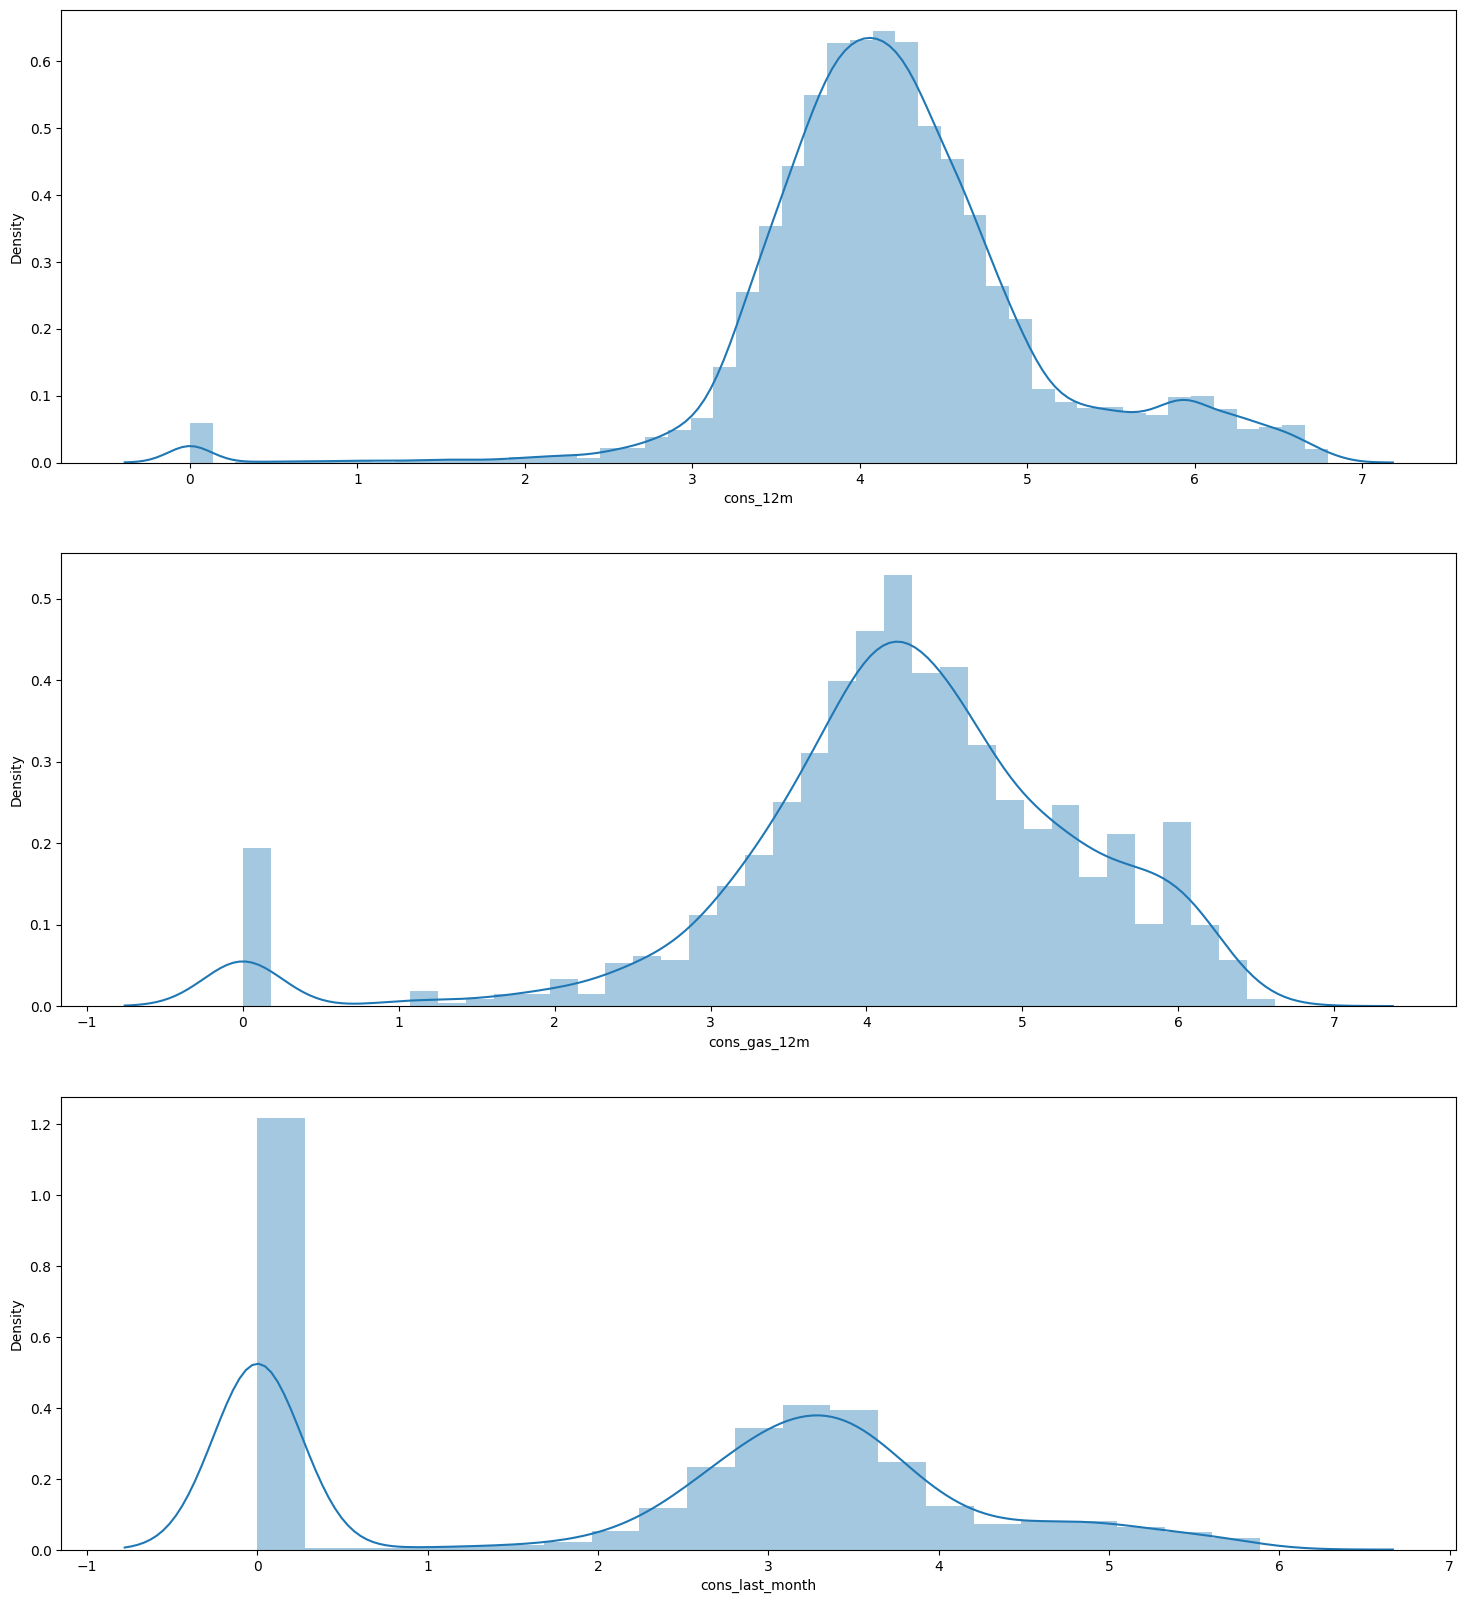

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
plt.show()

## Correlations

In [ ]:
df = df.drop(columns=['id'])

In [ ]:
correlation = df.corr()

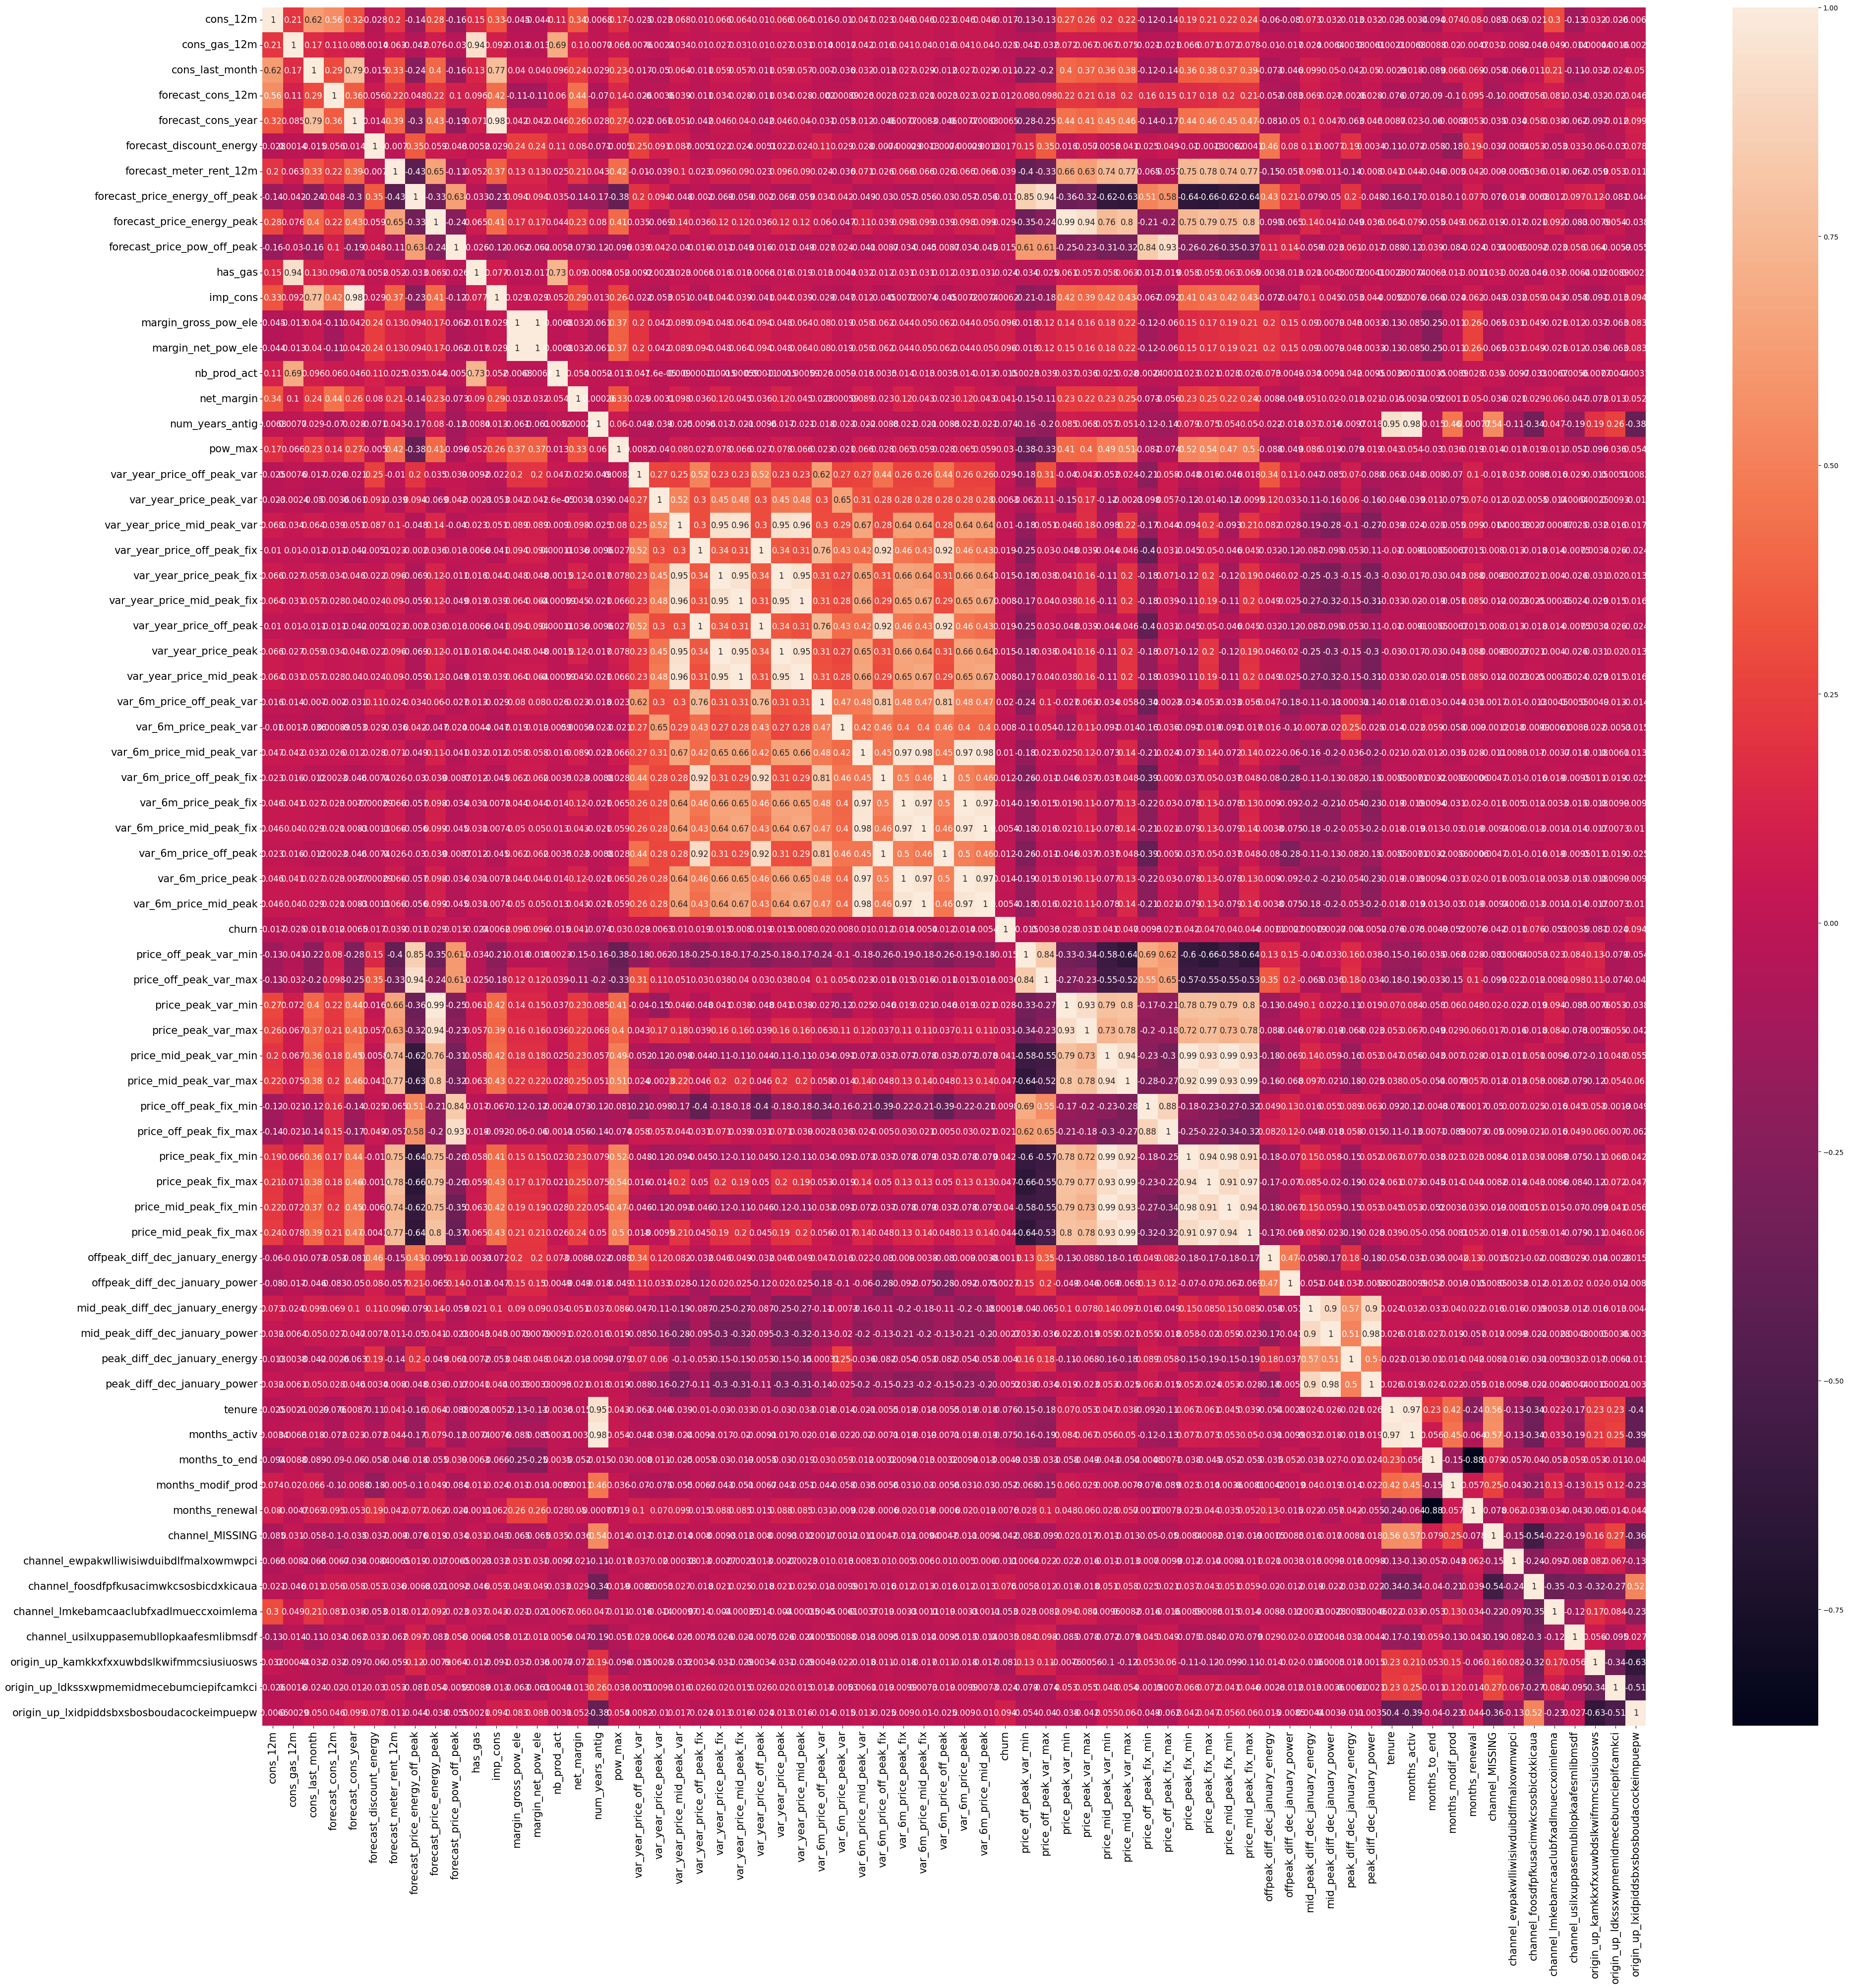

In [ ]:
# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation,
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values,
    annot=True,
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# Select columns with correlation > 0.065 or < -0.065 with 'churn'
correlation_threshold_high = 0.065
correlation_threshold_low = -0.065

selected_columns_high = correlation['churn'][correlation['churn'] > correlation_threshold_high].index.tolist()
selected_columns_low = correlation['churn'][correlation['churn'] < correlation_threshold_low].index.tolist()

selected_columns = selected_columns_high + selected_columns_low + ['churn']

# Create selected_df with selected columns
selected_df = df.loc[:, selected_columns]

print("Selected DataFrame:")
selected_df

Selected DataFrame:


margin_gross_pow_ele  margin_net_pow_ele  churn  \
0                     25.44               25.44      1   
1                     16.38               16.38      0   
2                     28.60               28.60      0   
3                     30.22               30.22      0   
4                     44.91               44.91      0   
...                     ...                 ...    ...   
14601                 27.88               27.88      0   
14602                  0.00                0.00      1   
14603                 39.84               39.84      1   
14604                 13.08               13.08      0   
14605                 11.84               11.84      0   

       channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                          True   
1                                         False   
2                                          True   
3                                         False   
4                                         False   
...                                         ...   
14601                                      True   
14602                                      True   
14603                                      True   
14604                                      True   
14605                                     False   

       origin_up_lxidpiddsbxsbosboudacockeimpuepw  num_years_antig  tenure  \
0                                            True                3       3   
1                                           False                6       7   
2                                           False                6       6   
3                                           False                6       6   
4                                           False                6       6   
...                                           ...              ...     ...   
14601                                        True                4       3   
14602                                        True                3       4   
14603                                        True                4       4   
14604                                        True                3       4   
14605                                       False                6       7   

       months_activ  origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  churn  
0                30                                       False      1  
1                74                                        True      0  
2                67                                        True      0  
3                67                                        True      0  
4                70                                        True      0  
...             ...                                         ...    ...  
14601            42                                       False      0  
14602            39                                       False      1  
14603            45                                       False      1  
14604            39                                       False      0  
14605            71                                       False      0  

[14606 rows x 10 columns]

In [ ]:
df = df.drop(columns=['num_years_antig', 'forecast_cons_year'])
df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 0.444045   
1                       0.0                 1.237292   
2                       0.0                 1.599009   
3                       0.0                 1.318689   
4                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  ...  months_modif_prod  \
0                    40.606701        1  ...                  1   
1                    44.311378        0  ...                 74   
2                    44.311378        0  ...                 67   
3                    44.311378        0  ...                 67   
4                    40.606701        0  ...                 70   

   months_renewal  channel_MISSING  channel_ewpakwlliwisiwduibdlfmalxowmwpci  \
0               6            False                                     False   
1               3             True                                     False   
2               8            False                                     False   
3               8            False                                     False   
4               9             True                                     False   

   channel_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                      True   
1                                     False   
2                                      True   
3                                     False   
4                                     False   

   channel_lmkebamcaaclubfxadlmueccxoimlema  \
0                                     False   
1                                     False   
2                                     False   
3                                      True   
4                                     False   

   channel_usilxuppasemubllopkaafesmlibmsdf  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                       False   
1                                        True   
2                                        True   
3                                        True   
4                                        True   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                        True  
1                                       False  
2                                       False  
3                                       False  
4                                       False  

[5 rows x 66 columns]

## Modelling
We are going to use `RandomForest` classifier.

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Data sampling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cons_12m                                    14606 non-null  float64
 1   cons_gas_12m                                14606 non-null  float64
 2   cons_last_month                             14606 non-null  float64
 3   forecast_cons_12m                           14606 non-null  float64
 4   forecast_discount_energy                    14606 non-null  float64
 5   forecast_meter_rent_12m                     14606 non-null  float64
 6   forecast_price_energy_off_peak              14606 non-null  float64
 7   forecast_price_energy_peak                  14606 non-null  float64
 8   forecast_price_pow_off_peak                 14606 non-null  float64
 9   has_gas                                     14606 non-null  int64  
 10  imp_cons  

In [ ]:
train_df = df.copy()

y = df['churn']
X = df.drop(columns=['churn'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape, y.shape

((14606, 65), (14606,))

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11684, 65), (2922, 65), (11684,), (2922,))

### Model training
A Random Forest is a type of machine learning model that uses many Decision Trees to make predictions. It’s like asking a crowd of people to solve a problem instead of just one person. Each person (or “tree”) in the crowd sees a part of the problem and gives their best guess. The final answer is decided by considering all these guesses.

The power of this approach comes from the fact that many weak learners (individual trees that are only somewhat accurate) can together form a strong learner (the forest that is very accurate). This is similar to the saying “many brains are better than one”.

The size of the crowd (number of trees) can be controlled by the data scientist. More trees usually mean better predictions, but also more computation and longer training time.

Random Forests have some advantages. They don’t require data scaling and can handle complex, non-linear problems. However, they also have disadvantages. They need a lot of computational power and can take a long time to train, especially on large datasets.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

In [ ]:
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [ ]:
y_test.value_counts()

churn
0    2617
1     305
Name: count, dtype: int64

In [ ]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 16
False positives: 8
True negatives: 2609
False negatives: 289

Accuracy: 0.8983572895277208
Precision: 0.6666666666666666
Recall: 0.05245901639344262


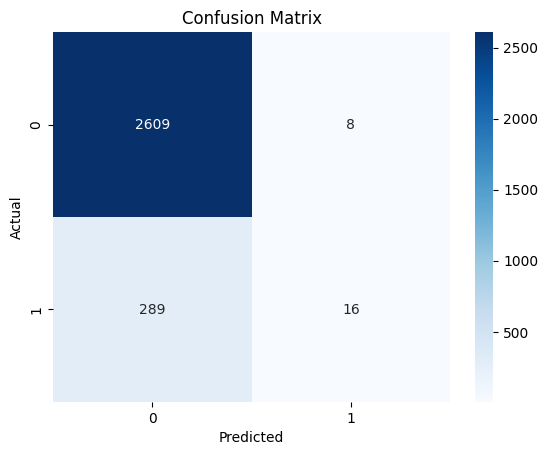

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
confusion_matrix

# Create a heatmap
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap='Blues')

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Model understanding

In [ ]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

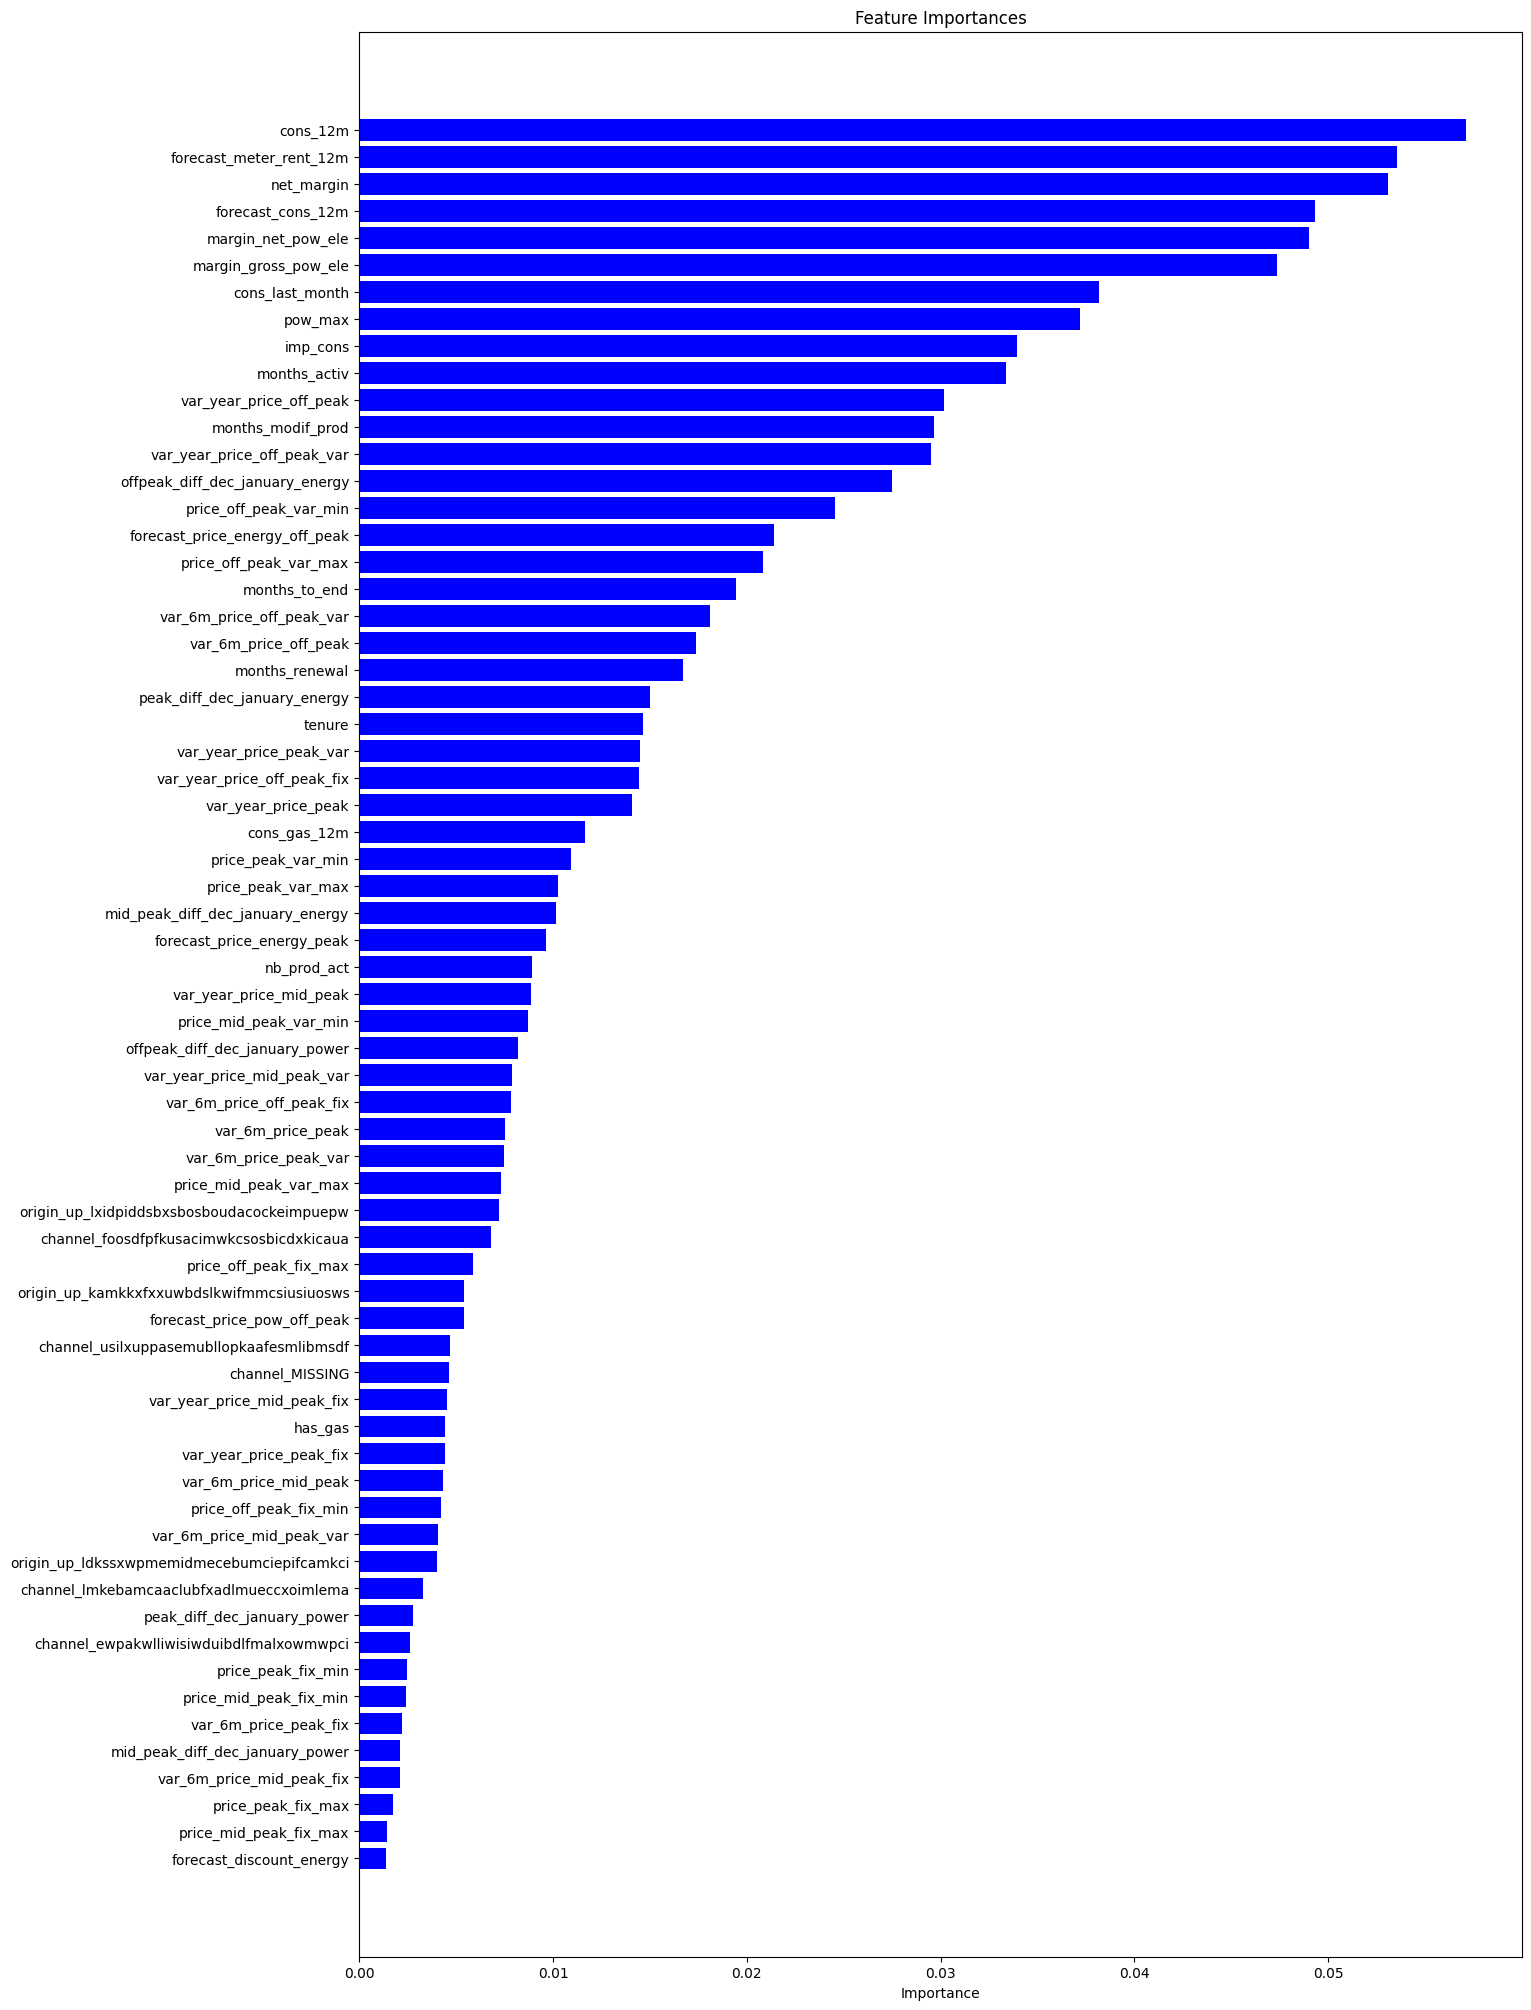

In [ ]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()


From this chart, we can observe the following key points:

1. Top Churn Drivers: Net margin and consumption over 12 months are major factors influencing churn.
2. Influential Factors: The margin on power subscriptions also significantly impacts churn.
3. Time Factors: Time-related factors, such as tenure and months since the last contract update, are influential.
4. Recommended Feature: The feature suggested by our colleague is in the top half of influential factors, with some derived features performing even better.
5. Price Sensitivity: Price sensitivity features are present but are not the main drivers of churn.
The last point relates to our original hypothesis:

Is churn driven by the customers' price sensitivity?

Based on feature importance, price sensitivity is a weak contributor to churn. More experimentation is needed to reach a conclusive result.

In [ ]:
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [ ]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [ ]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')